## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from scipy.sparse import hstack
from matplotlib.ticker import FuncFormatter

## Import Dataset

In [2]:
path = "/kaggle/input/preprocessed-fake-reviews-dataset/preprocessed-fake-reviews-dataset.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,rating,label,text_,cleaned_text,category_Books_5,category_Clothing_Shoes_and_Jewelry_5,category_Electronics_5,category_Home_and_Kitchen_5,category_Kindle_Store_5,category_Movies_and_TV_5,category_Pet_Supplies_5,category_Sports_and_Outdoors_5,category_Tools_and_Home_Improvement_5,category_Toys_and_Games_5
0,5.0,1,"Love this! Well made, sturdy, and very comfor...",Love this Well made sturdy and very comfortab...,False,False,False,True,False,False,False,False,False,False
1,5.0,1,"love it, a great upgrade from the original. I...",love it a great upgrade from the original Ive...,False,False,False,True,False,False,False,False,False,False
2,5.0,1,This pillow saved my back. I love the look and...,This pillow saved my back I love the look and ...,False,False,False,True,False,False,False,False,False,False
3,1.0,1,"Missing information on how to use it, but it i...",Missing information on how to use it but it is...,False,False,False,True,False,False,False,False,False,False
4,5.0,1,Very nice set. Good quality. We have had the s...,Very nice set Good quality We have had the set...,False,False,False,True,False,False,False,False,False,False


In [4]:
df.isnull().sum()

rating                                   0
label                                    0
text_                                    0
cleaned_text                             1
category_Books_5                         0
category_Clothing_Shoes_and_Jewelry_5    0
category_Electronics_5                   0
category_Home_and_Kitchen_5              0
category_Kindle_Store_5                  0
category_Movies_and_TV_5                 0
category_Pet_Supplies_5                  0
category_Sports_and_Outdoors_5           0
category_Tools_and_Home_Improvement_5    0
category_Toys_and_Games_5                0
dtype: int64

In [5]:
df['cleaned_text'] = df['cleaned_text'].fillna("")

In [6]:
df.isnull().sum()

rating                                   0
label                                    0
text_                                    0
cleaned_text                             0
category_Books_5                         0
category_Clothing_Shoes_and_Jewelry_5    0
category_Electronics_5                   0
category_Home_and_Kitchen_5              0
category_Kindle_Store_5                  0
category_Movies_and_TV_5                 0
category_Pet_Supplies_5                  0
category_Sports_and_Outdoors_5           0
category_Tools_and_Home_Improvement_5    0
category_Toys_and_Games_5                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   rating                                 40432 non-null  float64
 1   label                                  40432 non-null  int64  
 2   text_                                  40432 non-null  object 
 3   cleaned_text                           40432 non-null  object 
 4   category_Books_5                       40432 non-null  bool   
 5   category_Clothing_Shoes_and_Jewelry_5  40432 non-null  bool   
 6   category_Electronics_5                 40432 non-null  bool   
 7   category_Home_and_Kitchen_5            40432 non-null  bool   
 8   category_Kindle_Store_5                40432 non-null  bool   
 9   category_Movies_and_TV_5               40432 non-null  bool   
 10  category_Pet_Supplies_5                40432 non-null  bool   
 11  ca

In [8]:
df.describe()

,rating,label
count,40432.000000,40432.000000
mean,4.256579,0.500000
std,1.144354,0.500006
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.500000
75%,5.000000,1.000000
max,5.000000,1.000000


In [9]:
label_counts = df['label'].value_counts()

print("Jumlah Real Review (0):", label_counts[0])
print("Jumlah Fake Review (1):", label_counts[1])

Jumlah Real Review (0): 20216
Jumlah Fake Review (1): 20216


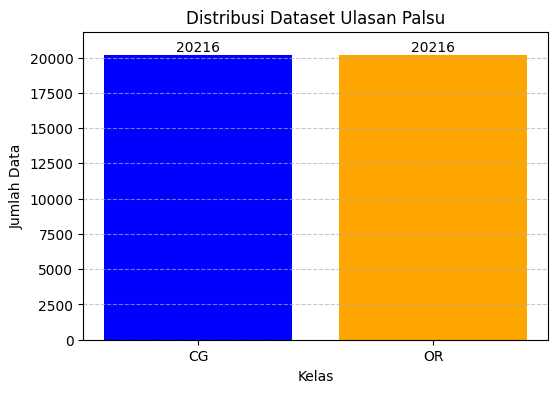

In [10]:
from collections import Counter
import matplotlib.pyplot as plt

train_counts = Counter(df['label'].astype(str))

label_mapping = {'0': 'OR', '1': 'CG'}
mapped_keys = [label_mapping[key] for key in train_counts.keys()]

plt.figure(figsize=(6, 4))
bars = plt.bar(mapped_keys, train_counts.values(), color=['blue', 'orange'])

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Dataset Ulasan Palsu")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.margins(y=0.08)

plt.show()


## Data Splitting

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df, df['label'], test_size=0.2, random_state=42, stratify=df['label'])

In [12]:
label_counts = y_train.value_counts()

print("Jumlah Real Review Train (0):", label_counts[0])
print("Jumlah Fake Review Train (1):", label_counts[1])

Jumlah Real Review Train (0): 16172
Jumlah Fake Review Train (1): 16173


In [13]:
label_counts = y_test.value_counts()

print("Jumlah Real Review Test (0):", label_counts[0])
print("Jumlah Fake Review Test (1):", label_counts[1])

Jumlah Real Review Test (0): 4044
Jumlah Fake Review Test (1): 4043


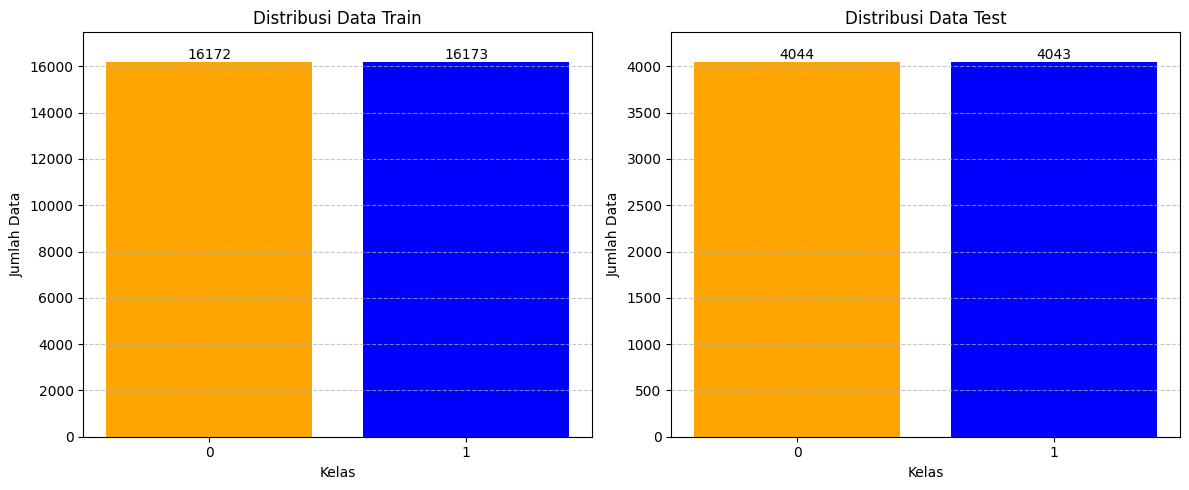

In [14]:
train_counts = Counter(y_train)
test_counts = Counter(y_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

bars_train = axes[0].bar(train_counts.keys(), train_counts.values(), color=['blue', 'orange'])
axes[0].set_title('Distribusi Data Train')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['0', '1'])
axes[0].set_xlabel('Kelas')
axes[0].set_ylabel('Jumlah Data')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].margins(y=0.08)

for bar in bars_train:
    height = bar.get_height()
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

bars_test = axes[1].bar(test_counts.keys(), test_counts.values(), color=['blue', 'orange'])
axes[1].set_title('Distribusi Data Test')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['0', '1'])
axes[1].set_xlabel('Kelas')
axes[1].set_ylabel('Jumlah Data')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].margins(y=0.08)

for bar in bars_test:
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

## TF-IDF

In [15]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=30, max_df=0.90, strip_accents='unicode', sublinear_tf=True)
X_train_tfidf = vectorizer.fit_transform(X_train['cleaned_text'])
X_test_tfidf = vectorizer.transform(X_test['cleaned_text'])

In [16]:
print("Jumlah fitur yang diekstrak:", len(vectorizer.vocabulary_))

Jumlah fitur yang diekstrak: 10256


In [17]:
df_train_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
df_test_tfidf = pd.DataFrame(X_test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

print("Data hasil ekstraksi (train):\n", df_train_tfidf.head())
print("Data hasil ekstraksi (test):\n", df_test_tfidf.head())

Data hasil ekstraksi (train):
     aa  ability  ability to  able  able to  about  about an  about and  \
0  0.0      0.0         0.0   0.0      0.0    0.0       0.0        0.0   
1  0.0      0.0         0.0   0.0      0.0    0.0       0.0        0.0   
2  0.0      0.0         0.0   0.0      0.0    0.0       0.0        0.0   
3  0.0      0.0         0.0   0.0      0.0    0.0       0.0        0.0   
4  0.0      0.0         0.0   0.0      0.0    0.0       0.0        0.0   

   about buying  about getting  ...  youtube  youve   yr  yr old  zero  zip  \
0           0.0            0.0  ...      0.0    0.0  0.0     0.0   0.0  0.0   
1           0.0            0.0  ...      0.0    0.0  0.0     0.0   0.0  0.0   
2           0.0            0.0  ...      0.0    0.0  0.0     0.0   0.0  0.0   
3           0.0            0.0  ...      0.0    0.0  0.0     0.0   0.0  0.0   
4           0.0            0.0  ...      0.0    0.0  0.0     0.0   0.0  0.0   

   zipper  zipper is  zippers  zoom  
0     0.0  

In [18]:
print(df_train_tfidf.iloc[[0, 1, 2, 3, -1], [-1]])
print(df_train_tfidf.iloc[[-1], list(range(6)) + [-1]])

       zoom
0       0.0
1       0.0
2       0.0
3       0.0
32344   0.0
        aa  ability  ability to  able  able to  about  zoom
32344  0.0      0.0         0.0   0.0      0.0    0.0   0.0


In [19]:
print(df_test_tfidf.iloc[[0, 1, 2, 3, -1], [-1]])
print(df_test_tfidf.iloc[[-1], list(range(6)) + [-1]])

      zoom
0      0.0
1      0.0
2      0.0
3      0.0
8086   0.0
       aa  ability  ability to  able  able to  about  zoom
8086  0.0      0.0         0.0   0.0      0.0    0.0   0.0


## Feature: rating, category, text_

In [20]:
features = [
    'rating',
    'category_Books_5',
    'category_Clothing_Shoes_and_Jewelry_5',
    'category_Electronics_5',
    'category_Home_and_Kitchen_5',
    'category_Kindle_Store_5',
    'category_Movies_and_TV_5',
    'category_Pet_Supplies_5',
    'category_Sports_and_Outdoors_5',
    'category_Tools_and_Home_Improvement_5',
    'category_Toys_and_Games_5'
    ]

X_train_features = X_train[features].astype(int).values
X_test_features = X_test[features].astype(int).values

X_train_combined = hstack([X_train_tfidf, X_train_features])
X_test_combined = hstack([X_test_tfidf, X_test_features])

In [21]:
print("Data Train:\n", X_train_combined.toarray()[:5])
print("Data Test:\n", X_test_combined.toarray()[:5])

Data Train:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Data Test:
 [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [22]:
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
nb_model = MultinomialNB()
xgb_model = XGBClassifier(random_state=42)

In [23]:
rf_model.fit(X_train_combined, y_train)
svm_model.fit(X_train_combined, y_train)
nb_model.fit(X_train_combined, y_train)
xgb_model.fit(X_train_combined, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [24]:
rf_y_pred = rf_model.predict(X_test_combined)
svm_y_pred = svm_model.predict(X_test_combined)
nb_y_pred = nb_model.predict(X_test_combined)
xgb_y_pred = xgb_model.predict(X_test_combined)

RF

In [25]:
accuracy_rf_1 = accuracy_score(y_test, rf_y_pred)
print(f'Akurasi: {accuracy_rf_1:.4f}')

precision_cg = precision_score(y_test, rf_y_pred)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, rf_y_pred)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, rf_y_pred)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9034
Presisi (Fake Review): 0.9267
Recall (Fake Review): 0.8761
F1-Score (Fake Review): 0.9007


SVM

In [26]:
accuracy_svm_1 = accuracy_score(y_test, svm_y_pred)
print(f'Akurasi: {accuracy_svm_1:.4f}')

precision_cg = precision_score(y_test, svm_y_pred)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, svm_y_pred)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, svm_y_pred)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9278
Presisi (Fake Review): 0.9517
Recall (Fake Review): 0.9013
F1-Score (Fake Review): 0.9258


NB

In [27]:
accuracy_nb_1 = accuracy_score(y_test, nb_y_pred)
print(f'Akurasi: {accuracy_nb_1:.4f}')

precision_cg = precision_score(y_test, nb_y_pred)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, nb_y_pred)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, nb_y_pred)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9019
Presisi (Fake Review): 0.8960
Recall (Fake Review): 0.9095
F1-Score (Fake Review): 0.9027


XGB

In [28]:
accuracy_xgb_1 = accuracy_score(y_test, xgb_y_pred)
print(f'Akurasi: {accuracy_xgb_1:.4f}')

precision_cg = precision_score(y_test, xgb_y_pred)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, xgb_y_pred)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, xgb_y_pred)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9018
Presisi (Fake Review): 0.9199
Recall (Fake Review): 0.8803
F1-Score (Fake Review): 0.8996


## Feature: rating, text_

In [29]:
features = [
    'rating'
    ]

X_train_features = X_train[features].astype(int).values
X_test_features = X_test[features].astype(int).values

X_train_combined = hstack([X_train_tfidf, X_train_features])
X_test_combined = hstack([X_test_tfidf, X_test_features])

In [30]:
print("Data Train:\n", X_train_combined.toarray()[:5])
print("Data Test:\n", X_test_combined.toarray()[:5])

Data Train:
 [[0. 0. 0. ... 0. 0. 4.]
 [0. 0. 0. ... 0. 0. 3.]
 [0. 0. 0. ... 0. 0. 5.]
 [0. 0. 0. ... 0. 0. 5.]
 [0. 0. 0. ... 0. 0. 1.]]
Data Test:
 [[0. 0. 0. ... 0. 0. 5.]
 [0. 0. 0. ... 0. 0. 5.]
 [0. 0. 0. ... 0. 0. 5.]
 [0. 0. 0. ... 0. 0. 5.]
 [0. 0. 0. ... 0. 0. 2.]]


In [31]:
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
nb_model = MultinomialNB()
xgb_model = XGBClassifier(random_state=42)

In [32]:
rf_model.fit(X_train_combined, y_train)
svm_model.fit(X_train_combined, y_train)
nb_model.fit(X_train_combined, y_train)
xgb_model.fit(X_train_combined, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [33]:
rf_y_pred = rf_model.predict(X_test_combined)
svm_y_pred = svm_model.predict(X_test_combined)
nb_y_pred = nb_model.predict(X_test_combined)
xgb_y_pred = xgb_model.predict(X_test_combined)

RF

In [34]:
accuracy_rf_2 = accuracy_score(y_test, rf_y_pred)
print(f'Akurasi: {accuracy_rf_2:.4f}')

precision_cg = precision_score(y_test, rf_y_pred)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, rf_y_pred)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, rf_y_pred)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9057
Presisi (Fake Review): 0.9309
Recall (Fake Review): 0.8763
F1-Score (Fake Review): 0.9028


SVM

In [35]:
accuracy_svm_2 = accuracy_score(y_test, svm_y_pred)
print(f'Akurasi: {accuracy_svm_2:.4f}')

precision_cg = precision_score(y_test, svm_y_pred)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, svm_y_pred)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, svm_y_pred)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9289
Presisi (Fake Review): 0.9513
Recall (Fake Review): 0.9040
F1-Score (Fake Review): 0.9271


NB

In [36]:
accuracy_nb_2 = accuracy_score(y_test, nb_y_pred)
print(f'Akurasi: {accuracy_nb_2:.4f}')

precision_cg = precision_score(y_test, nb_y_pred)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, nb_y_pred)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, nb_y_pred)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9021
Presisi (Fake Review): 0.8962
Recall (Fake Review): 0.9095
F1-Score (Fake Review): 0.9028


XGB

In [37]:
accuracy_xgb_2 = accuracy_score(y_test, xgb_y_pred)
print(f'Akurasi: {accuracy_xgb_2:.4f}')

precision_cg = precision_score(y_test, xgb_y_pred)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, xgb_y_pred)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, xgb_y_pred)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9039
Presisi (Fake Review): 0.9231
Recall (Fake Review): 0.8813
F1-Score (Fake Review): 0.9017


## Feature: category, text_

In [38]:
features = [
    'category_Books_5',
    'category_Clothing_Shoes_and_Jewelry_5',
    'category_Electronics_5',
    'category_Home_and_Kitchen_5',
    'category_Kindle_Store_5',
    'category_Movies_and_TV_5',
    'category_Pet_Supplies_5',
    'category_Sports_and_Outdoors_5',
    'category_Tools_and_Home_Improvement_5',
    'category_Toys_and_Games_5'
    ]

X_train_features = X_train[features].astype(int).values
X_test_features = X_test[features].astype(int).values

X_train_combined = hstack([X_train_tfidf, X_train_features])
X_test_combined = hstack([X_test_tfidf, X_test_features])

In [39]:
print("Data Train:\n", X_train_combined.toarray()[:5])
print("Data Test:\n", X_test_combined.toarray()[:5])

Data Train:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Data Test:
 [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [40]:
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
nb_model = MultinomialNB()
xgb_model = XGBClassifier(random_state=42)

In [41]:
rf_model.fit(X_train_combined, y_train)
svm_model.fit(X_train_combined, y_train)
nb_model.fit(X_train_combined, y_train)
xgb_model.fit(X_train_combined, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [42]:
rf_y_pred = rf_model.predict(X_test_combined)
svm_y_pred = svm_model.predict(X_test_combined)
nb_y_pred = nb_model.predict(X_test_combined)
xgb_y_pred = xgb_model.predict(X_test_combined)

RF

In [43]:
accuracy_rf_3 = accuracy_score(y_test, rf_y_pred)
print(f'Akurasi: {accuracy_rf_3:.4f}')

precision_cg = precision_score(y_test, rf_y_pred)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, rf_y_pred)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, rf_y_pred)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9037
Presisi (Fake Review): 0.9268
Recall (Fake Review): 0.8766
F1-Score (Fake Review): 0.9010


SVM

In [44]:
accuracy_svm_3 = accuracy_score(y_test, svm_y_pred)
print(f'Akurasi: {accuracy_svm_3:.4f}')

precision_cg = precision_score(y_test, svm_y_pred)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, svm_y_pred)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, svm_y_pred)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9457
Presisi (Fake Review): 0.9609
Recall (Fake Review): 0.9293
F1-Score (Fake Review): 0.9448


NB

In [45]:
accuracy_nb_3 = accuracy_score(y_test, nb_y_pred)
print(f'Akurasi: {accuracy_nb_3:.4f}')

precision_cg = precision_score(y_test, nb_y_pred)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, nb_y_pred)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, nb_y_pred)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9018
Presisi (Fake Review): 0.8965
Recall (Fake Review): 0.9085
F1-Score (Fake Review): 0.9025


XGB

In [46]:
accuracy_xgb_3 = accuracy_score(y_test, xgb_y_pred)
print(f'Akurasi: {accuracy_xgb_3:.4f}')

precision_cg = precision_score(y_test, xgb_y_pred)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, xgb_y_pred)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, xgb_y_pred)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.8985
Presisi (Fake Review): 0.9161
Recall (Fake Review): 0.8773
F1-Score (Fake Review): 0.8963


## Feature: text_

In [47]:
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
nb_model = MultinomialNB()
xgb_model = XGBClassifier(random_state=42)

In [48]:
rf_model.fit(X_train_tfidf, y_train)
svm_model.fit(X_train_tfidf, y_train)
nb_model.fit(X_train_tfidf, y_train)
xgb_model.fit(X_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [49]:
rf_y_pred = rf_model.predict(X_test_tfidf)
svm_y_pred = svm_model.predict(X_test_tfidf)
nb_y_pred = nb_model.predict(X_test_tfidf)
xgb_y_pred = xgb_model.predict(X_test_tfidf)

RF

In [50]:
accuracy_rf_4 = accuracy_score(y_test, rf_y_pred)
print(f'Akurasi: {accuracy_rf_4:.4f}')

precision_cg = precision_score(y_test, rf_y_pred)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, rf_y_pred)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, rf_y_pred)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9038
Presisi (Fake Review): 0.9306
Recall (Fake Review): 0.8726
F1-Score (Fake Review): 0.9007


SVM

In [51]:
accuracy_svm_4 = accuracy_score(y_test, svm_y_pred)
print(f'Akurasi: {accuracy_svm_4:.4f}')

precision_cg = precision_score(y_test, svm_y_pred)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, svm_y_pred)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, svm_y_pred)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9504
Presisi (Fake Review): 0.9612
Recall (Fake Review): 0.9387
F1-Score (Fake Review): 0.9498


NB

In [52]:
accuracy_nb_4 = accuracy_score(y_test, nb_y_pred)
print(f'Akurasi: {accuracy_nb_4:.4f}')

precision_cg = precision_score(y_test, nb_y_pred)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, nb_y_pred)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, nb_y_pred)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9026
Presisi (Fake Review): 0.8974
Recall (Fake Review): 0.9090
F1-Score (Fake Review): 0.9032


XGB

In [53]:
accuracy_xgb_4 = accuracy_score(y_test, xgb_y_pred)
print(f'Akurasi: {accuracy_xgb_4:.4f}')

precision_cg = precision_score(y_test, xgb_y_pred)
print(f'Presisi (Fake Review): {precision_cg:.4f}')

recall_cg = recall_score(y_test, xgb_y_pred)
print(f'Recall (Fake Review): {recall_cg:.4f}')

f1_cg = f1_score(y_test, xgb_y_pred)
print(f'F1-Score (Fake Review): {f1_cg:.4f}')

Akurasi: 0.9028
Presisi (Fake Review): 0.9183
Recall (Fake Review): 0.8842
F1-Score (Fake Review): 0.9010


## Comparison

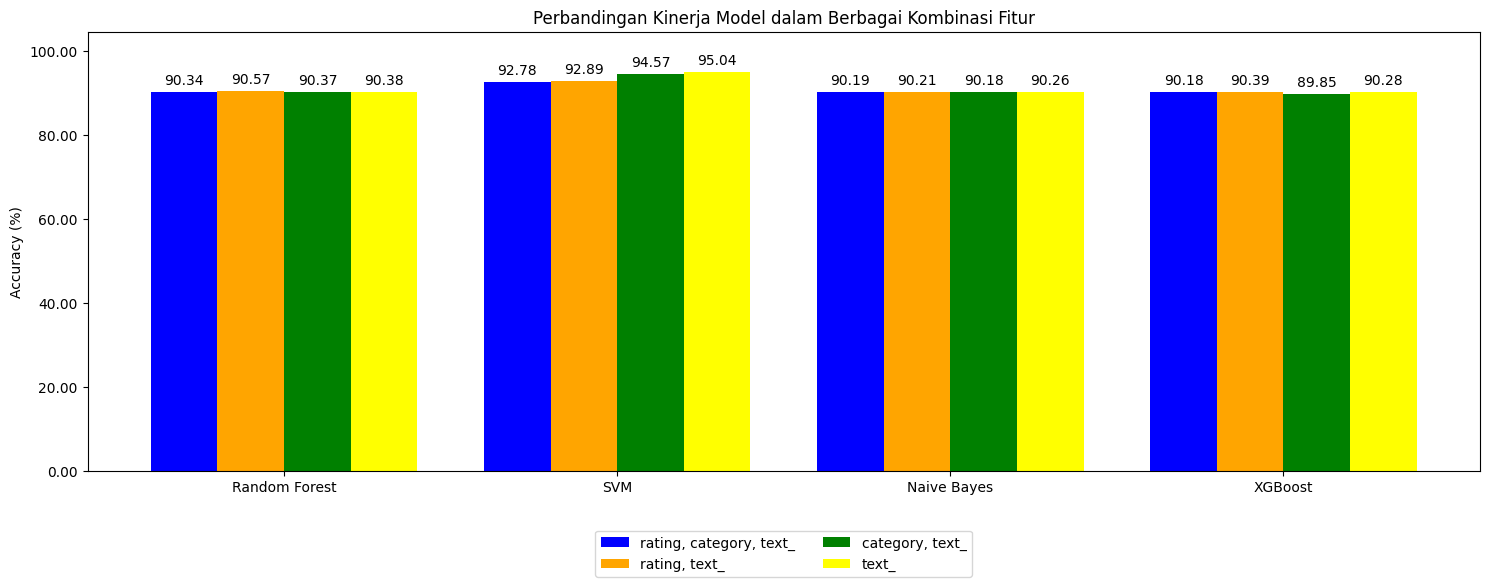

In [54]:
models = ['Random Forest', 'SVM', 'Naive Bayes', 'XGBoost']
accuracy_1 = [accuracy_rf_1, accuracy_svm_1, accuracy_nb_1, accuracy_xgb_1]
accuracy_2 = [accuracy_rf_2, accuracy_svm_2, accuracy_nb_2, accuracy_xgb_2]
accuracy_3 = [accuracy_rf_3, accuracy_svm_3, accuracy_nb_3, accuracy_xgb_3]
accuracy_4 = [accuracy_rf_4, accuracy_svm_4, accuracy_nb_4, accuracy_xgb_4]

x = np.arange(len(models))
width = 0.20

fig, ax = plt.subplots(figsize=(15, 6))

bars1 = ax.bar(x - 1.5*width, accuracy_1, width, label='rating, category, text_', color='blue')
bars2 = ax.bar(x - 0.5*width, accuracy_2, width, label='rating, text_', color='orange')
bars3 = ax.bar(x + 0.5*width, accuracy_3, width, label='category, text_', color='green')
bars4 = ax.bar(x + 1.5*width, accuracy_4, width, label='text_', color='yellow')

for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height*100:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

formatter = FuncFormatter(lambda y, _: f'{y*100:.2f}')
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('Accuracy (%)')
ax.set_title('Perbandingan Kinerja Model dalam Berbagai Kombinasi Fitur')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2)
ax.margins(y=0.1)

plt.tight_layout()
plt.show()
